In [1]:
!pip install matplotlib numpy lxml


In [1]:
import urllib.request

url = "https://www.ppe.gla.ac.uk/~abuckley/top.lhe"
file_path = "top.lhe"

# Download the file
urllib.request.urlretrieve(url, file_path)

print("File downloaded")


File downloaded


In [4]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Open the LHE file and read its contents
file_path = "top.lhe"

with open(file_path, "r") as file:
    data = file.readlines()

# Extract events from <event> ... </event> sections
events = []
inside_event = False
current_event = []

for line in data:
    if "<event>" in line:
        inside_event = True
        current_event = []
    elif "</event>" in line:
        inside_event = False
        events.append(current_event)
    elif inside_event:
        current_event.append(line.strip())

# Print the number of extracted events
print(f"Total events found: {len(events)}")


Total events found: 991


In [3]:
for i, event in enumerate(events[:5]):  # Process first 5 events for now
    total_particles = 0
    final_particles = 0
    px_sum, py_sum, pz_sum, energy_sum = 0.0, 0.0, 0.0, 0.0
    
    for line in event[1:]:  # Skip the first line (event metadata)
        parts = line.split()
        
        if len(parts) < 10:  # Ignore malformed lines
            continue
        
        total_particles += 1
        status = int(parts[1])  # Status code (1 = final-state particle)
        
        px, py, pz, energy = map(float, parts[6:10])  # Extract momentum values
        
        if status == 1:  # Final-state particle
            final_particles += 1

        # Sum momenta
        px_sum += px
        py_sum += py
        pz_sum += pz
        energy_sum += energy

    # Print event summary
    print(f"\nEvent {i+1}:")
    print(f"  Total Particles: {total_particles}")
    print(f"  Final Particles: {final_particles}")
    print(f"  Momentum Sums - Px: {px_sum:.2f}, Py: {py_sum:.2f}, Pz: {pz_sum:.2f}, Energy: {energy_sum:.2f}")

print("\nProcessed first 5 events!")




Event 1:
  Total Particles: 13
  Final Particles: 7
  Momentum Sums - Px: -26.73, Py: -154.79, Pz: -4030.49, Energy: 4364.43

Event 2:
  Total Particles: 13
  Final Particles: 7
  Momentum Sums - Px: 60.72, Py: -74.18, Pz: -888.98, Energy: 1698.64

Event 3:
  Total Particles: 13
  Final Particles: 7
  Momentum Sums - Px: 49.19, Py: 96.67, Pz: -621.75, Energy: 2739.83

Event 4:
  Total Particles: 13
  Final Particles: 7
  Momentum Sums - Px: 9.99, Py: 0.81, Pz: 217.15, Energy: 2455.09

Event 5:
  Total Particles: 14
  Final Particles: 8
  Momentum Sums - Px: 11.96, Py: -11.04, Pz: 181.74, Energy: 1921.28

Processed first 5 events!


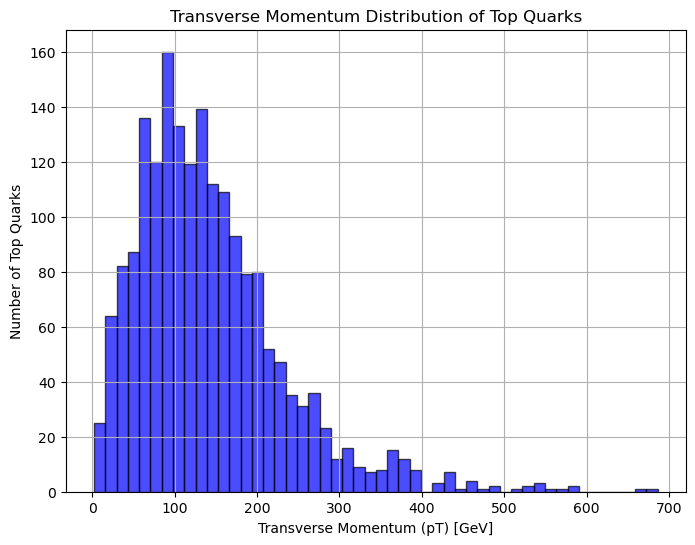

In [4]:
import matplotlib.pyplot as plt
import numpy as np

top_pT = []

for event in events:
    for line in event[1:]:  # Skip metadata
        parts = line.split()
        if len(parts) < 10:
            continue
        
        pdg_id = int(parts[0])  # Particle ID
        px, py = float(parts[6]), float(parts[7])  # Extract px, py

        # Check if the particle is a top quark (PDG ID: 6 or -6 for anti-top)
        if abs(pdg_id) == 6:
            pT = np.sqrt(px**2 + py**2)  # Compute transverse momentum
            top_pT.append(pT)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(top_pT, bins=50, color='b', alpha=0.7, edgecolor='black')
plt.xlabel("Transverse Momentum (pT) [GeV]")
plt.ylabel("Number of Top Quarks")
plt.title("Transverse Momentum Distribution of Top Quarks")
plt.grid(True)
plt.show()



In [8]:
!pip install networkx matplotlib plotly


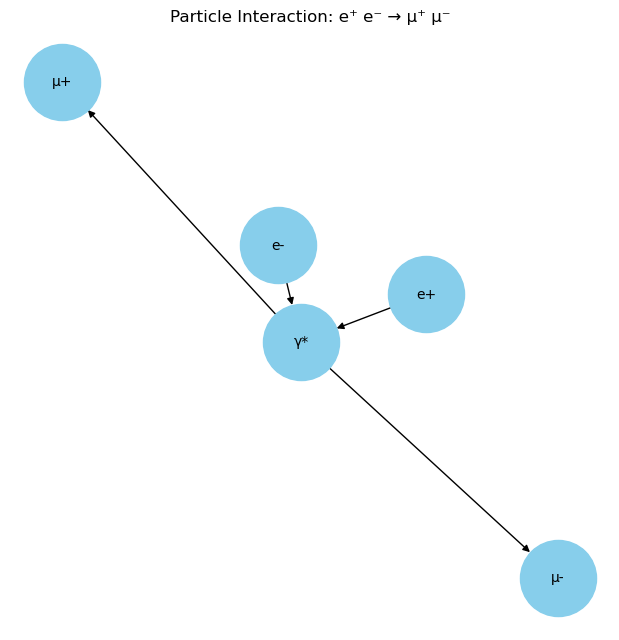

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Define particles
particles = {
    "e+": "Positron",
    "e-": "Electron",
    "γ*": "Virtual Photon",
    "μ+": "Muon",
    "μ-": "Anti-Muon"
}

# Add nodes
for particle in particles:
    G.add_node(particle, label=particles[particle])

# Add edges (representing the interaction)
G.add_edges_from([
    ("e+", "γ*"),  # Positron contributes to virtual photon
    ("e-", "γ*"),  # Electron contributes to virtual photon
    ("γ*", "μ+"),  # Virtual photon decays into Muon
    ("γ*", "μ-")   # Virtual photon decays into Anti-Muon
])

# Draw the graph
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G)  # Positioning
nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="black", node_size=3000, font_size=10)

plt.title("Particle Interaction: e⁺ e⁻ → μ⁺ μ⁻")
plt.show()


In [14]:
import networkx as nx
import plotly.graph_objects as go

# Create directed graph
G = nx.DiGraph()
edges = [
    ("e+", "γ*", "Positron annihilation"),
    ("e-", "γ*", "Electron annihilation"),
    ("γ*", "μ+", "Photon decays into Muon"),
    ("γ*", "μ-", "Photon decays into Anti-Muon")
]

# Add edges to graph
for edge in edges:
    G.add_edge(edge[0], edge[1], interaction=edge[2])

# Define positions manually for clean layout
pos = {
    "e+": (-1, 1),
    "e-": (-1, -1),
    "γ*": (0, 0),
    "μ+": (1, 1),
    "μ-": (1, -1)
}

# Extract node positions
node_x, node_y = zip(*[pos[n] for n in G.nodes()])

# Extract edge positions
edge_x, edge_y, edge_text = [], [], []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_text.append(f"{edge[2]['interaction']}")

# Create edge traces with interaction tooltips
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=2.5, color='gray'),
    hoverinfo='text',
    text=edge_text,
    mode='lines'
)

# Create node traces with hover effects
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    marker=dict(size=40, color="lightblue", line=dict(width=3, color="black")),
    text=list(G.nodes()),
    textposition="top center",
    hoverinfo="text",
    hovertext=[f"Particle: {n}" for n in G.nodes()]
)

# Create interactive figure
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title="Particle Interaction: e⁺ e⁻ → μ⁺ μ⁻",
    title_x=0.5,
    showlegend=False,
    hovermode="closest",
    margin=dict(b=10, t=40, l=10, r=10),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

# Show interactive graph
fig.show()

